# Modelling the distribution of wealth and income

Fig 1 "cdf of the fiscal annual income in France in the year 2010"
Click "SaveFig" in the widget.

har is missing, running pure python


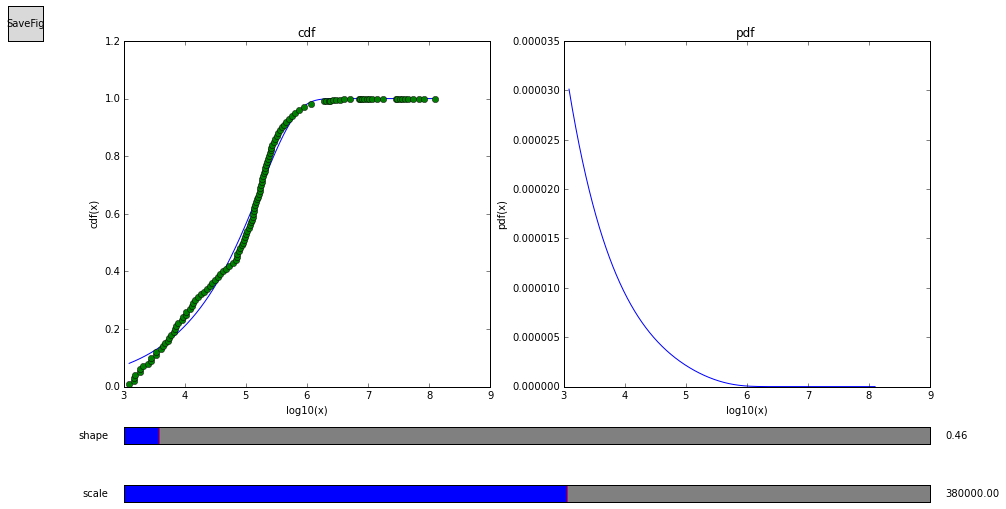

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
from scipy.stats import lognorm,gamma
import sys
sys.path.append('..')
from gpareto import *
fit_widget_pareto_WID()
plt.rc('font',size=18)

# Numerical results

Fig ?
With the relationship  $(1-\alpha_1) WB_s^i + (r (1-\alpha_1) -\alpha_2) M^i = \alpha_0^i$, and the distribution of $M_i$, one can compute the cdf of $WB_s$.

Then it can be compared with the direct fit of $WB_s$ to WID income data.


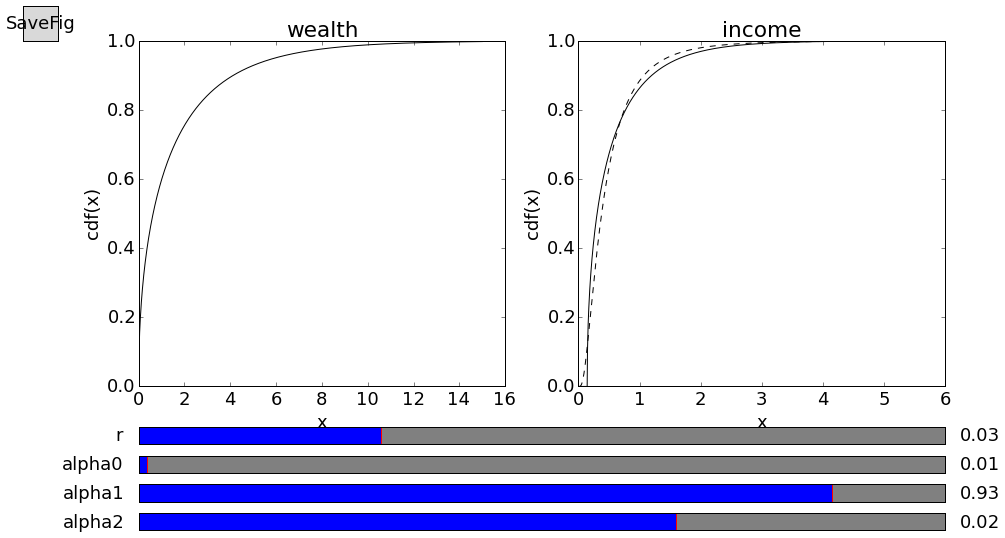

In [2]:
fit_widget_MtoWBs()

Fig ?: compare cdf obtained by direct fit and sampling.

In the directory 'tests', run the test:

    nosetests transmat_test.py:TestClass_bmw_1F1BnW.test_hd_lognorm
    
Then:    

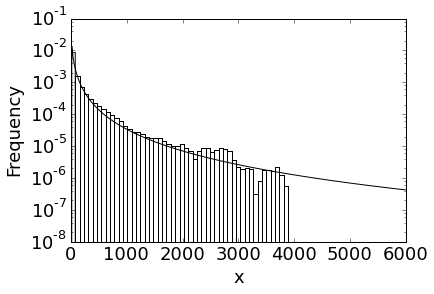

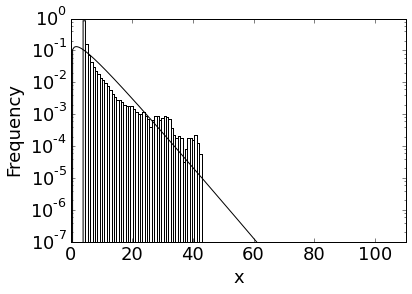

In [21]:
# get data: Mi
fname= '../data/samples.h5'
groupname = '/bmw_11N/transmat_test/lognorm'
label = "test_hd_lognorm"
store = pd.HDFStore(fname)
c=store[groupname+'/config/'+label]
config=json.loads( c[0].decode())
label = config['label'] 
ncol = store[groupname+'/samples/'+label].shape[1]
idx_bool= np.array(config['model_params']['labels'])=='M'
idx_M = np.arange(ncol)[idx_bool]
x=store[groupname+'/samples/'+label][idx_M].values
sigma = config['experiment_params']['sigma']
scale = config['experiment_params']['scale']
rv = lognorm(sigma,scale=scale)

# plot, and compare to weight function f imposed on Mi samples
fs = 18; nbins = 50 ; log = True
Mtot = np.sum(x[-1,:])
fig = plt.figure()
count,bins,patches=plt.hist(x.flatten(),nbins, normed = True, log=log,color='k', fill=False)
xx=np.linspace(0,Mtot,1000);
plt.plot(xx  , rv.pdf(xx), color='k' )
plt.xlim([0,6000]);# plt.ylim([0,0.01])
plt.xlabel('x',fontsize=fs); plt.ylabel('Frequency',fontsize=fs)
fig.savefig('../fig/hist_wealth_lognorm.pdf')

# get data: WBs
idx_bool= np.array(config['model_params']['labels'])=='WBs'
idx = np.arange(ncol)[idx_bool]
x=store[groupname+'/samples/'+label][idx].values
WBs_tot = np.sum(x[-1,:])
dim = x.shape[1]
shape=1.46; 
scale=  WBs_tot/(shape*float(dim))   # fit to WID data: 15542; 
rv = gamma(shape,scale=scale)

# plot, and compare to fit to direct macroeconomic fit
fig = plt.figure()
count,bins,patches=plt.hist(x.flatten(),nbins, normed = True, log=log,color='k', fill=False)
xx=np.linspace(0,WBs_tot,1000);
plt.plot(xx  , rv.pdf(xx), color='k' )
plt.xlim([0,WBs_tot/5]); plt.ylim([1e-7,1])
plt.xlabel('x',fontsize=fs); plt.ylabel('Frequency',fontsize=fs)
fig.savefig('../fig/hist_income_gamma.pdf')
